In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"E:\Relationship AI\data/raw/speed_dating_data.csv", encoding="latin1")

In [3]:
print("Shape:", df.shape)
df.head()

Shape: (8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df['dec'].value_counts()

dec
0    4860
1    3518
Name: count, dtype: int64

In [5]:
selected_cols = [
    "dec",           # Target
    "attr", "sinc", "intel", "fun", "amb", "shar",  # Partner ratings
    'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', # User preferences
    "age", "age_o", 
    'int_corr', 'samerace', 'prob'
]

In [6]:
df_model = df[selected_cols].copy()

In [7]:
print(df_model.shape)
df_model.head()

(8378, 18)


,dec,attr,sinc,intel,fun,amb,shar,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,age,age_o,int_corr,samerace,prob
0,1,6.0,9.0,7.0,7.0,6.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,21.0,27.0,0.14,0,6.0
1,1,7.0,8.0,7.0,8.0,5.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,21.0,22.0,0.54,0,5.0
2,1,5.0,8.0,9.0,8.0,5.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,21.0,22.0,0.16,1,NaN
3,1,7.0,6.0,8.0,7.0,6.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,21.0,23.0,0.61,0,6.0
4,1,5.0,6.0,7.0,7.0,6.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,21.0,24.0,0.21,0,6.0


In [8]:
df_model.isnull().sum()


dec            0
attr         202
sinc         277
intel        296
fun          350
amb          712
shar        1067
attr1_1       79
sinc1_1       79
intel1_1      79
fun1_1        89
amb1_1        99
shar1_1      121
age           95
age_o        104
int_corr     158
samerace       0
prob         309
dtype: int64

In [9]:
# Meaningful Names
rename_map = {
    'dec': 'decision',
    'attr': 'rating_attractiveness',
    'sinc': 'rating_sincerity',
    'intel': 'rating_intelligence',
    'fun': 'rating_fun',
    'amb': 'rating_ambition',
    'shar': 'rating_interests',
    'attr1_1': 'pref_attractiveness',
    'sinc1_1': 'pref_sincerity',
    'intel1_1': 'pref_intelligence',
    'fun1_1': 'pref_fun',
    'amb1_1': 'pref_ambition',
    'shar1_1': 'pref_interests',
    'age': 'user_age',
    'age_o': 'partner_age',
    'prob': 'user_expectation_of_yes'
}

In [10]:
df_model = df_model.rename(columns=rename_map)

In [11]:
for col in df_model.columns:
    df_model[col] = df_model[col].fillna(df_model[col].median())


In [12]:
df_model.dtypes


decision                     int64
rating_attractiveness      float64
rating_sincerity           float64
rating_intelligence        float64
rating_fun                 float64
rating_ambition            float64
rating_interests           float64
pref_attractiveness        float64
pref_sincerity             float64
pref_intelligence          float64
pref_fun                   float64
pref_ambition              float64
pref_interests             float64
user_age                   float64
partner_age                float64
int_corr                   float64
samerace                     int64
user_expectation_of_yes    float64
dtype: object

In [13]:
# df_model = df_model.rename(columns={
#     "dec": "decision",
#     "attr": "attractiveness",
#     "sinc": "sincerity",
#     "intel": "intelligence",
#     "fun": "fun_level",
#     "amb": "ambition",
#     "shar": "shared_interests",
#     "age": "user_age",
#     "age_o": "partner_age",
#     "samerace": "same_race",
#     "int_corr": "interest_correlation",
#     "age_diff": "age_difference"
# })


In [14]:
df_model.describe()


,decision,rating_attractiveness,rating_sincerity,rating_intelligence,rating_fun,rating_ambition,rating_interests,pref_attractiveness,pref_sincerity,pref_intelligence,pref_fun,pref_ambition,pref_interests,user_age,partner_age,int_corr,samerace,user_expectation_of_yes
count,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000
mean,0.419909,6.185414,7.169372,7.355574,6.425639,6.796431,5.541478,22.490920,17.403778,20.263108,17.462811,10.674474,11.827706,26.354858,26.360468,0.196274,0.395799,5.199869
std,0.493573,1.926733,1.711587,1.524334,1.916210,1.717241,2.021959,12.530536,7.013803,6.750992,6.053083,6.089035,6.317675,3.546684,3.541689,0.300669,0.489051,2.090285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,-0.830000,0.000000,0.000000
25%,0.000000,5.000000,6.000000,7.000000,5.000000,6.000000,4.000000,15.000000,15.000000,17.650000,15.000000,5.000000,10.000000,24.000000,24.000000,-0.010000,0.000000,4.000000
50%,0.000000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,26.000000,26.000000,0.210000,0.000000,5.000000
75%,1.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,25.000000,20.000000,23.260000,20.000000,15.000000,15.690000,28.000000,28.000000,0.430000,1.000000,7.000000
max,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,55.000000,55.000000,0.910000,1.000000,10.000000


In [15]:
df_model = df_model[(df_model['user_age'] < 60)]

In [16]:
df_model.shape

(8378, 18)

# STEP 4: ADVANCED FEATURE ENGINEERING

In [17]:
# 1. Match Score: How well did the partner meet the user's specific desires?
traits = ['attractiveness', 'sincerity', 'intelligence', 'fun', 'ambition', 'interests']
for trait in traits:
    df_model[f'{trait}_match_index'] = df_model[f'rating_{trait}'] * df_model[f'pref_{trait}']

# 2. Physical Reality
df_model['age_diff'] = abs(df_model['user_age'] - df_model['partner_age'])

In [ ]:
# df_model['age_difference'] = abs(df_model['user_age'] - df_model['partner_age'])


In [18]:
# Drop the raw preference columns to keep model focused on the 'Match Index'
df_model.drop(columns=[f'pref_{t}' for t in traits], inplace=True)

In [19]:
df_model

,decision,rating_attractiveness,rating_sincerity,rating_intelligence,rating_fun,rating_ambition,rating_interests,user_age,partner_age,int_corr,samerace,user_expectation_of_yes,attractiveness_match_index,sincerity_match_index,intelligence_match_index,fun_match_index,ambition_match_index,interests_match_index,age_diff
0,1,6.0,9.0,7.0,7.0,6.0,5.0,21.0,27.0,0.14,0,6.0,90.0,180.0,140.0,105.0,90.0,75.0,6.0
1,1,7.0,8.0,7.0,8.0,5.0,6.0,21.0,22.0,0.54,0,5.0,105.0,160.0,140.0,120.0,75.0,90.0,1.0
2,1,5.0,8.0,9.0,8.0,5.0,7.0,21.0,22.0,0.16,1,5.0,75.0,160.0,180.0,120.0,75.0,105.0,1.0
3,1,7.0,6.0,8.0,7.0,6.0,8.0,21.0,23.0,0.61,0,6.0,105.0,120.0,160.0,105.0,90.0,120.0,2.0
4,1,5.0,6.0,7.0,7.0,6.0,6.0,21.0,24.0,0.21,0,6.0,75.0,120.0,140.0,105.0,90.0,90.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,3.0,5.0,5.0,5.0,7.0,6.0,25.0,26.0,0.64,0,5.0,210.0,0.0,75.0,75.0,0.0,0.0,1.0
8374,0,4.0,6.0,8.0,4.0,4.0,6.0,25.0,24.0,0.71,0,4.0,280.0,0.0,120.0,60.0,0.0,0.0,1.0
8375,0,4.0,7.0,8.0,8.0,8.0,6.0,25.0,29.0,-0.46,0,5.0,280.0,0.0,120.0,120.0,0.0,0.0,4.0
8376,0,4.0,6.0,5.0,4.0,7.0,5.0,25.0,22.0,0.62,0,5.0,280.0,0.0,75.0,60.0,0.0,0.0,3.0


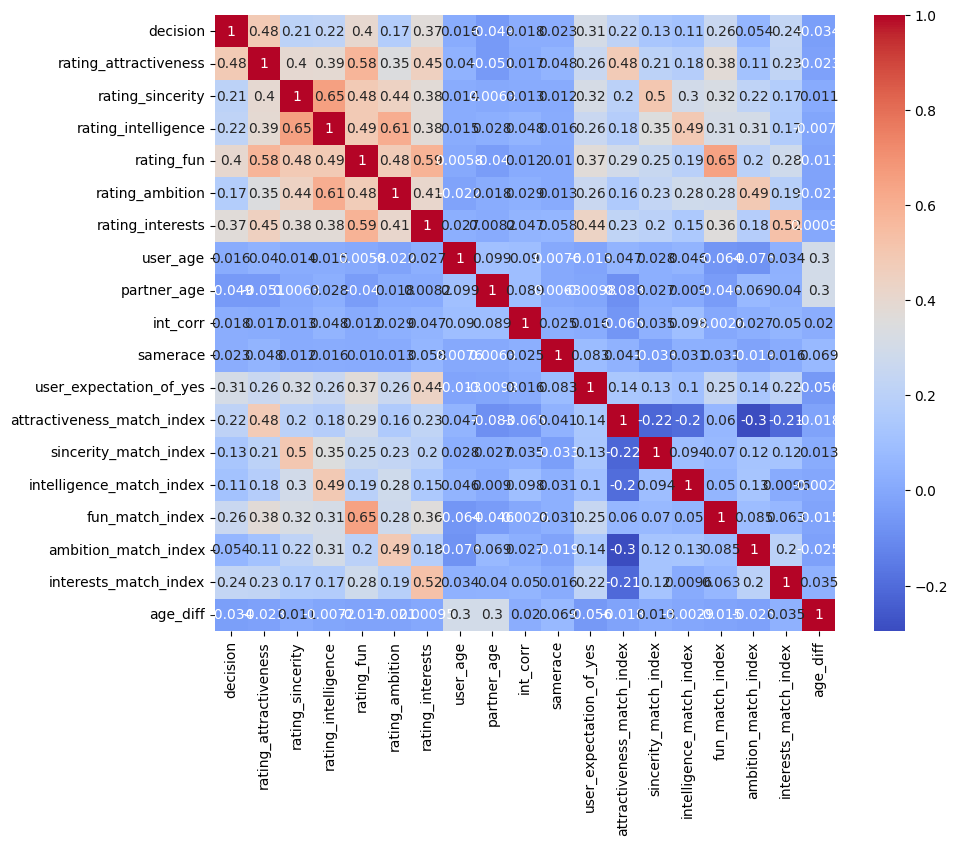

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm")
plt.show()


In [21]:
from sklearn.preprocessing import MinMaxScaler

rating_cols = [
    "attractiveness",
    "sincerity",
    "intelligence",
    "fun_level",
    "ambition",
    "shared_interests"
]

scaler = MinMaxScaler()
df_model[rating_cols] = scaler.fit_transform(df_model[rating_cols])


KeyError: "None of [Index(['attractiveness', 'sincerity', 'intelligence', 'fun_level', 'ambition',\n       'shared_interests'],\n      dtype='object')] are in the [columns]"

In [ ]:
# df_model["compatibility_score"] = (
#     df_model["attractiveness"] * 0.25 +
#     df_model["fun_level"] * 0.20 +
#     df_model["shared_interests"] * 0.20 +
#     df_model["intelligence"] * 0.15 +
#     df_model["sincerity"] * 0.10 +
#     df_model["ambition"] * 0.10
# )


In [ ]:
# df_model["age_difference_norm"] = (
#     df_model["age_difference"] / df_model["age_difference"].max()
# )


In [16]:
df_model["same_race"] = df_model["same_race"].astype(int)


In [17]:
df_model["interest_alignment"] = (
    df_model["shared_interests"] * df_model["interest_correlation"]
)


In [18]:
df_model.drop(columns=["interest_correlation"], inplace=True)


In [19]:
df_model.columns


Index(['decision', 'attractiveness', 'sincerity', 'intelligence', 'fun_level',
       'ambition', 'shared_interests', 'user_age', 'partner_age', 'same_race',
       'age_difference', 'interest_alignment'],
      dtype='object')

In [20]:
X = df_model.drop(columns=["decision"])
y = df_model["decision"]

print(X.shape, y.shape)


(8378, 11) (8378,)


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

rf_preds = rf.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, rf_preds))
print(confusion_matrix(y_test, rf_preds))


Random Forest Results:

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       972
           1       0.72      0.67      0.69       704

    accuracy                           0.75      1676
   macro avg       0.75      0.74      0.74      1676
weighted avg       0.75      0.75      0.75      1676

[[793 179]
 [234 470]]


In [24]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [25]:
xgb_preds = xgb.predict(X_test)

print("XGBoost Results:\n")
print(classification_report(y_test, xgb_preds))
print(confusion_matrix(y_test, xgb_preds))


XGBoost Results:

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       972
           1       0.72      0.69      0.70       704

    accuracy                           0.76      1676
   macro avg       0.75      0.75      0.75      1676
weighted avg       0.76      0.76      0.76      1676

[[785 187]
 [221 483]]


In [27]:
from sklearn.metrics import roc_auc_score

xgb_probs = xgb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, xgb_probs)

print("ROC-AUC:", roc_auc)


ROC-AUC: 0.834125397493453


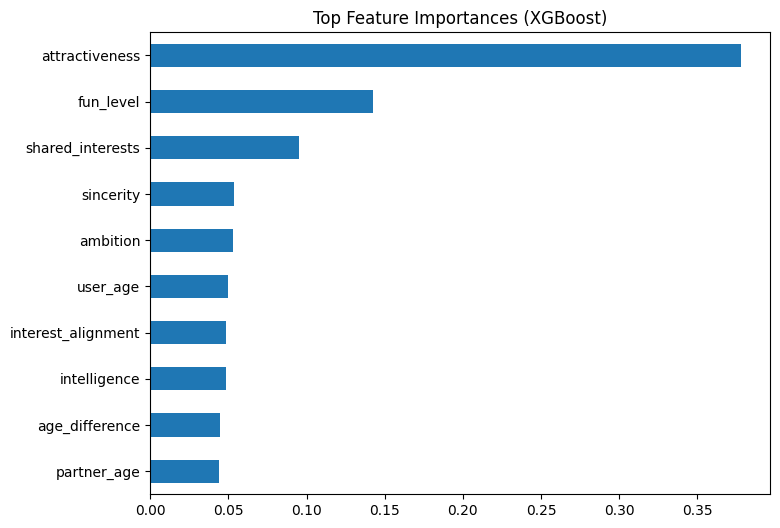

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

importance = pd.Series(
    xgb.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
importance.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top Feature Importances (XGBoost)")
plt.show()


In [29]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)


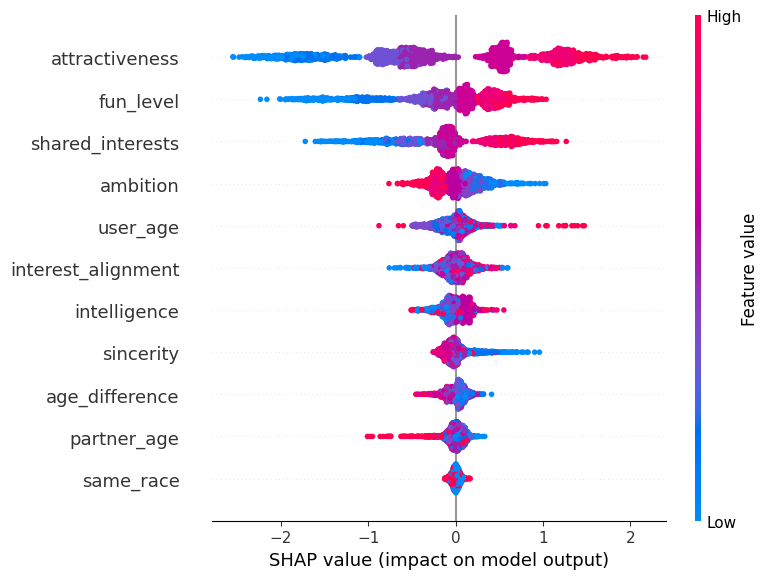

In [30]:
shap.summary_plot(shap_values, X_test)


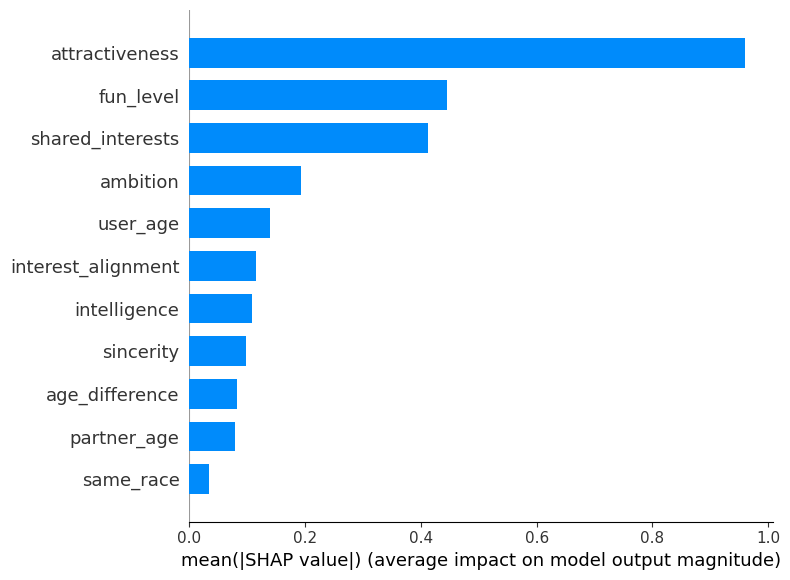

In [31]:
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [32]:
sample = X_test.iloc[0]


In [33]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], sample)


In [34]:
xgb.predict_proba(sample.values.reshape(1, -1))


array([[0.43581545, 0.56418455]], dtype=float32)

In [35]:
param_grid = {
    "n_estimators": [200, 300, 400],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.03, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}


In [36]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [37]:
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="roc_auc",   # IMPORTANT
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.8, 0.9],
                         'learning_rate': [0.03, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [200, 300, 400],
                         'subsample': [0.7, 0.8, 0.9]},
             scoring='roc_auc', verbose=2)

In [38]:
grid_search.best_params_


{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 7,
 'n_estimators': 200,
 'subsample': 0.9}

In [39]:
best_xgb = grid_search.best_estimator_

best_xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [42]:
from sklearn.metrics import classification_report, roc_auc_score

final_preds = best_xgb.predict(X_test)
final_probs = best_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, final_preds))
print("Final ROC-AUC:", roc_auc_score(y_test, final_probs))


              precision    recall  f1-score   support

           0       0.79      0.82      0.80       972
           1       0.73      0.69      0.71       704

    accuracy                           0.77      1676
   macro avg       0.76      0.76      0.76      1676
weighted avg       0.76      0.77      0.76      1676

Final ROC-AUC: 0.8380974092779649
